# House Price Nov 16
## Version: 01




In [120]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


import scipy
import seaborn as sns


In [154]:
original_train = pd.read_csv("https://luo200105.github.io/DataHost/IN3007/Original_train.csv")
original_test = pd.read_csv("https://luo200105.github.io/DataHost/IN3007/Original_test.csv")

In [123]:
original_train.info()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [124]:
original_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

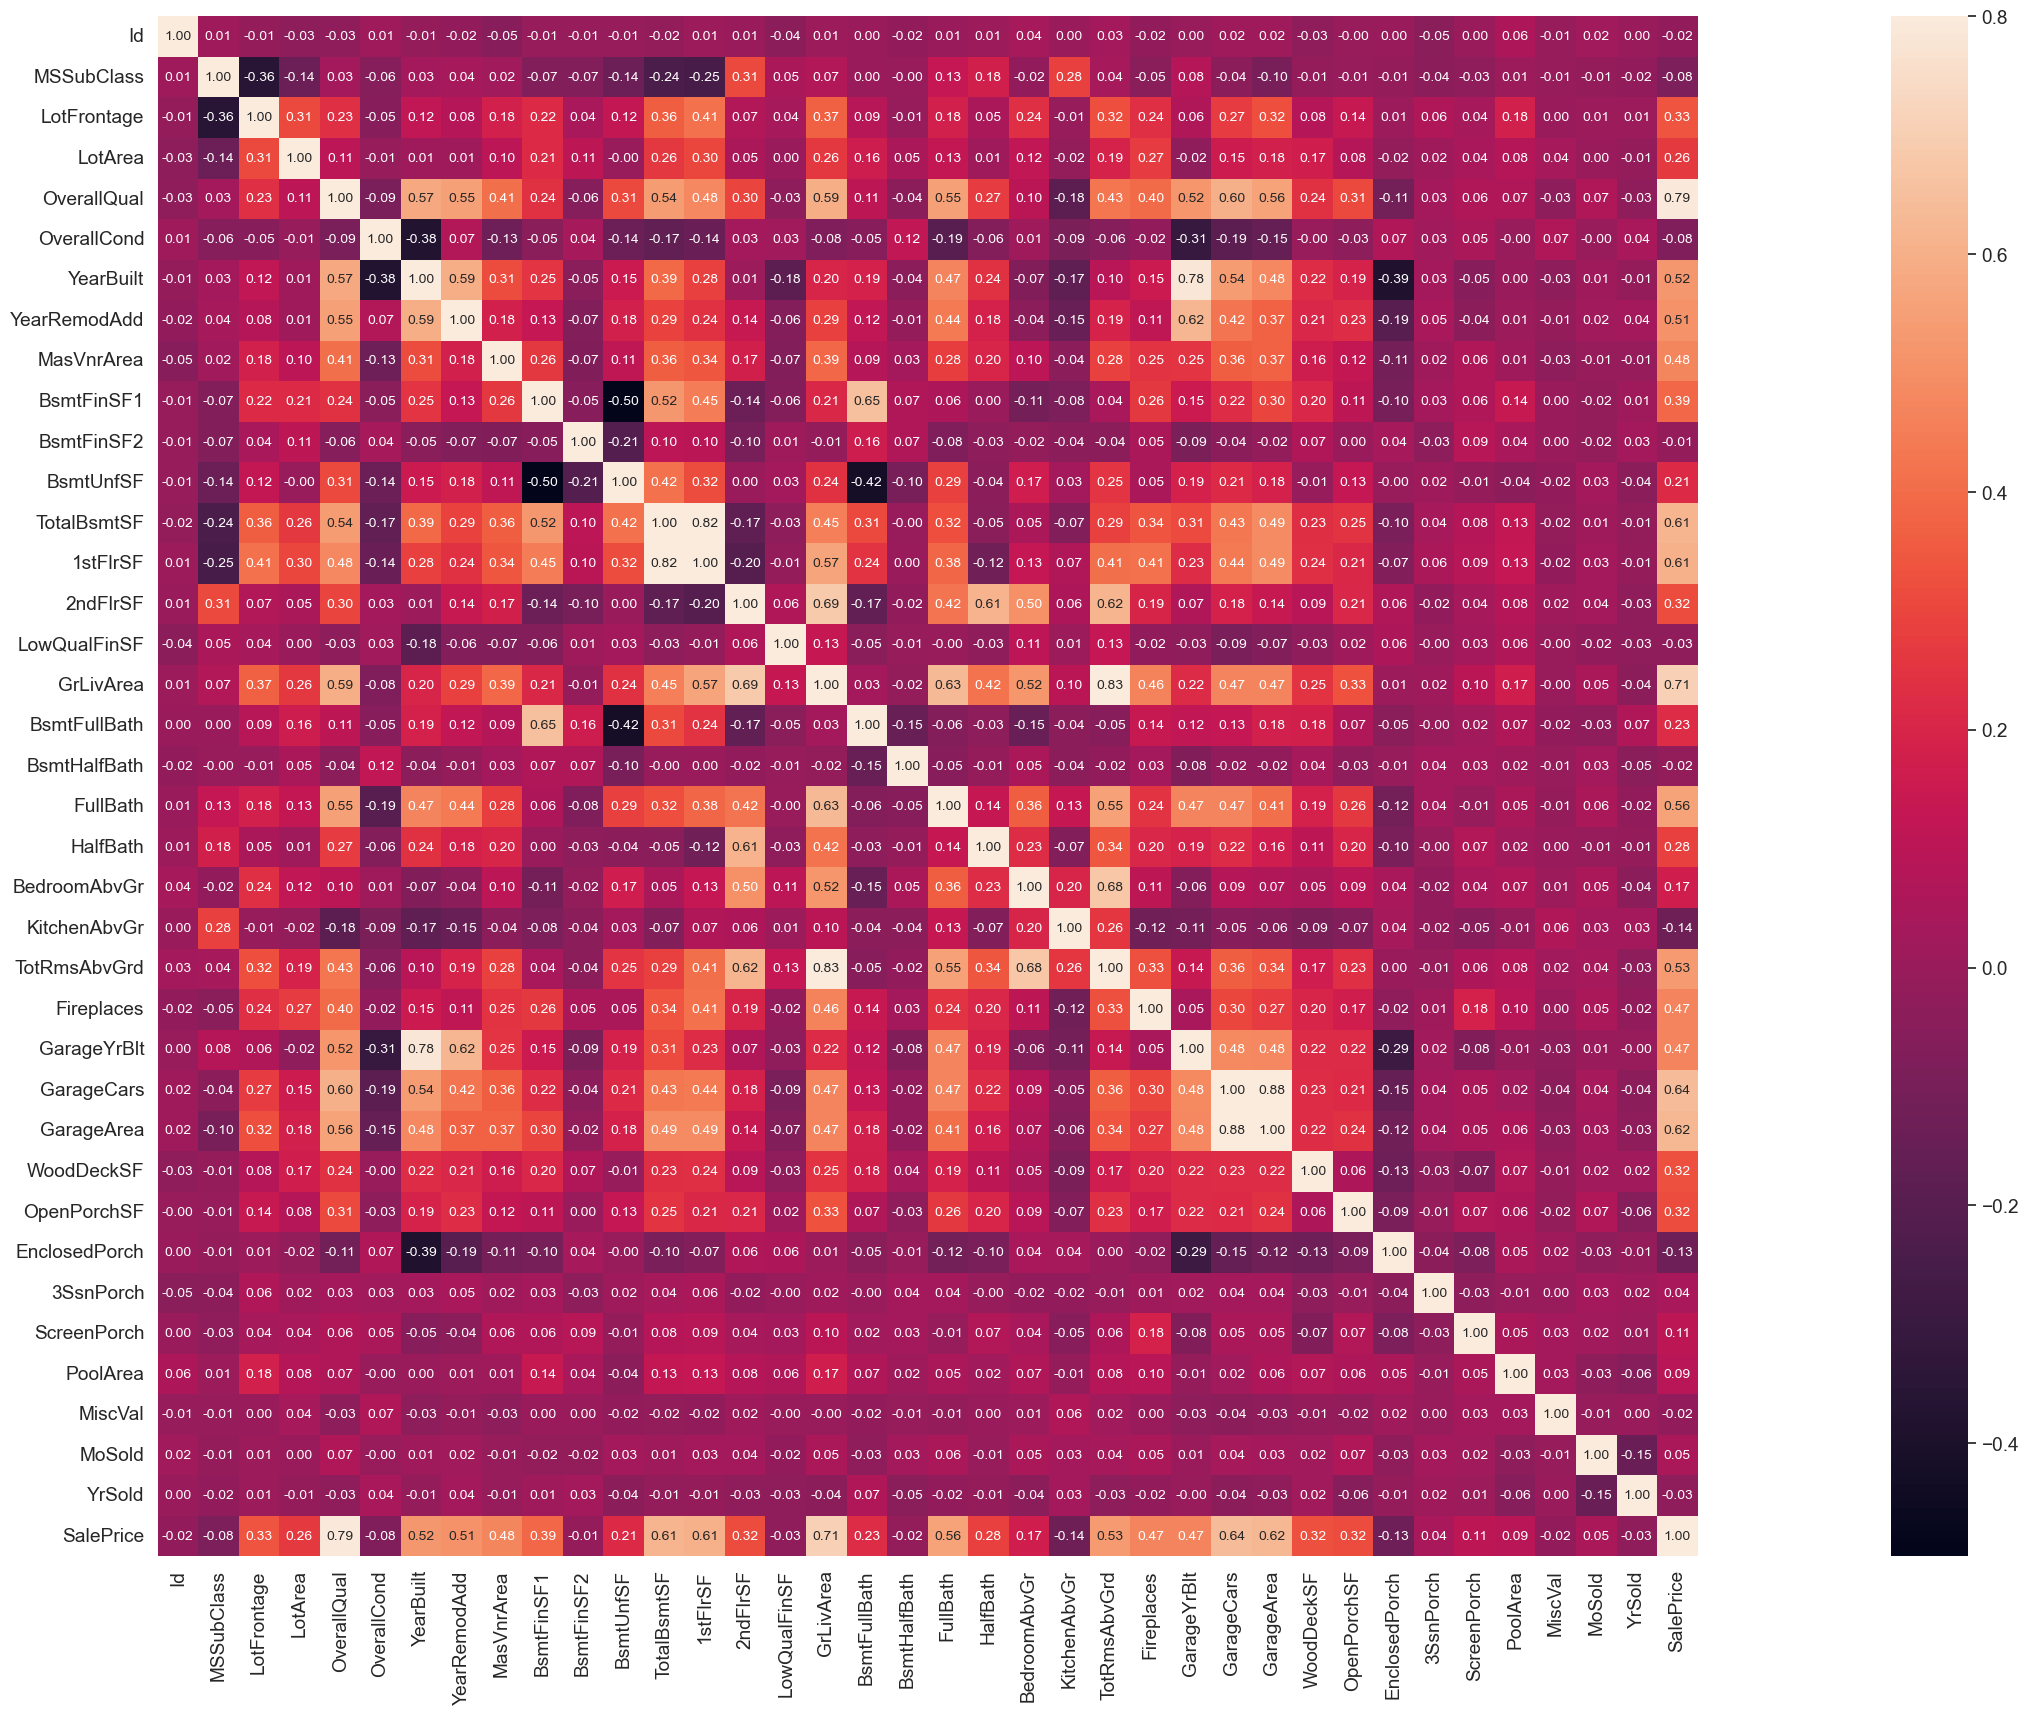

In [159]:
#correlation matrix
corrmat_train = original_train.corr()
f, ax = plot.subplots(figsize=(50, 20))
sns.heatmap(corrmat_train, vmax=.8, square=True, annot=True, fmt='.2f', annot_kws={'size': 10});

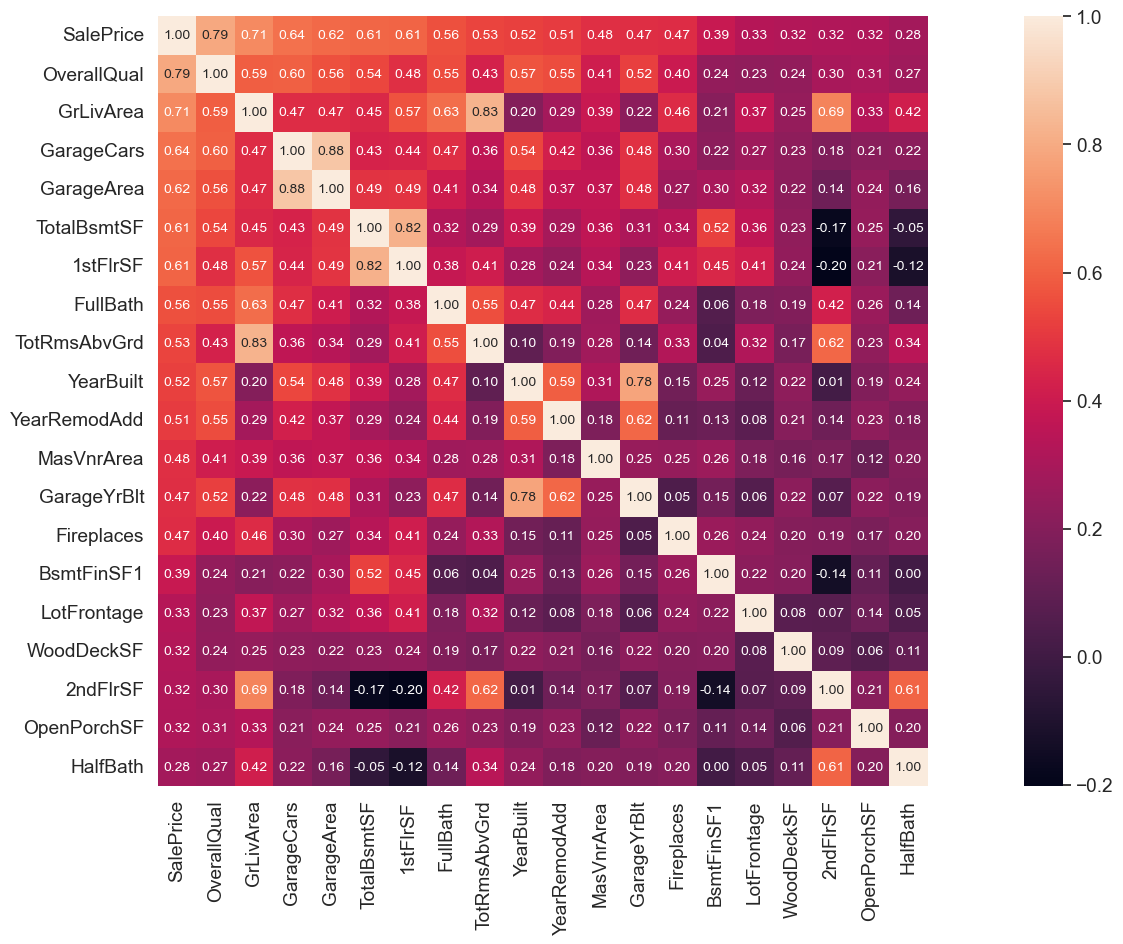

In [160]:
#saleprice correlation matrix
k = 20
cols = corrmat_train.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(original_train[cols].values.T)
f, ax = plot.subplots(figsize=(25 , 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plot.show()
# Shows the correlation between the top 20 variables and SalePrice
# the most correlated variable is OverallQual

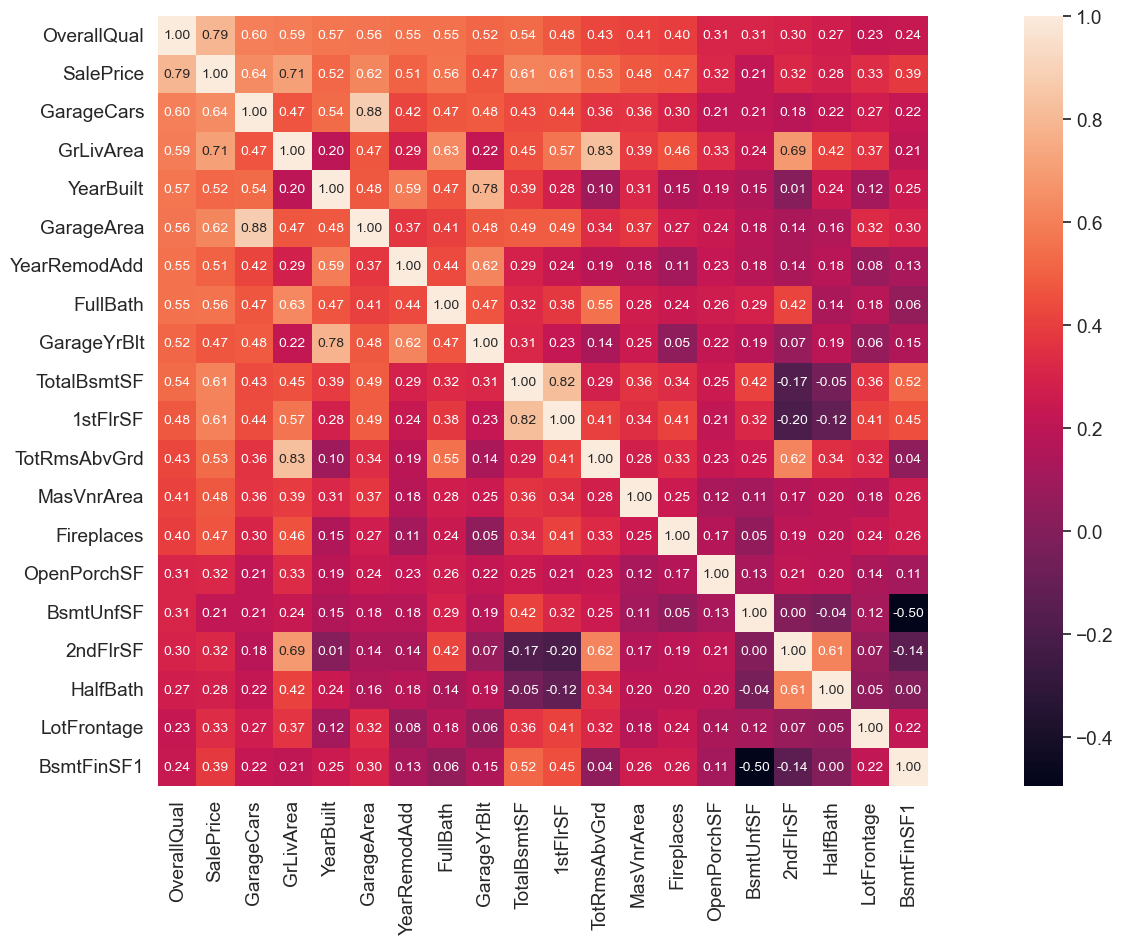

In [146]:
# Overall quality correlation matrix
k = 20
cols = corrmat_train.nlargest(k, 'OverallQual')['OverallQual'].index
cm = np.corrcoef(original_train[cols].values.T)
f, ax = plot.subplots(figsize=(25 , 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plot.show()

In [156]:
original_train.isnull().sum().sort_values(ascending=False).head(20)
# drop the columns with more than 259 missing values in the training set
original_train = original_train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

In [158]:
# We can see that there are a lot of missing values in the dataset
# however, there are 3 columns that is in the front 20 columns correlated with SalePrice
# Filled in with mean
original_train['GarageYrBlt']=original_train['GarageYrBlt'].fillna(original_train['GarageYrBlt'].mean())
original_train['MasVnrArea']=original_train['MasVnrArea'].fillna(original_train['MasVnrArea'].mean())
original_train['LotFrontage']=original_train['LotFrontage'].fillna(original_train['LotFrontage'].mean())
original_train.isnull().sum().sort_values(ascending=False).head(20)

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
MasVnrType       8
Electrical       1
FullBath         0
BsmtHalfBath     0
TotRmsAbvGrd     0
BsmtFullBath     0
HalfBath         0
GrLivArea        0
LowQualFinSF     0
BedroomAbvGr     0
KitchenAbvGr     0
dtype: int64

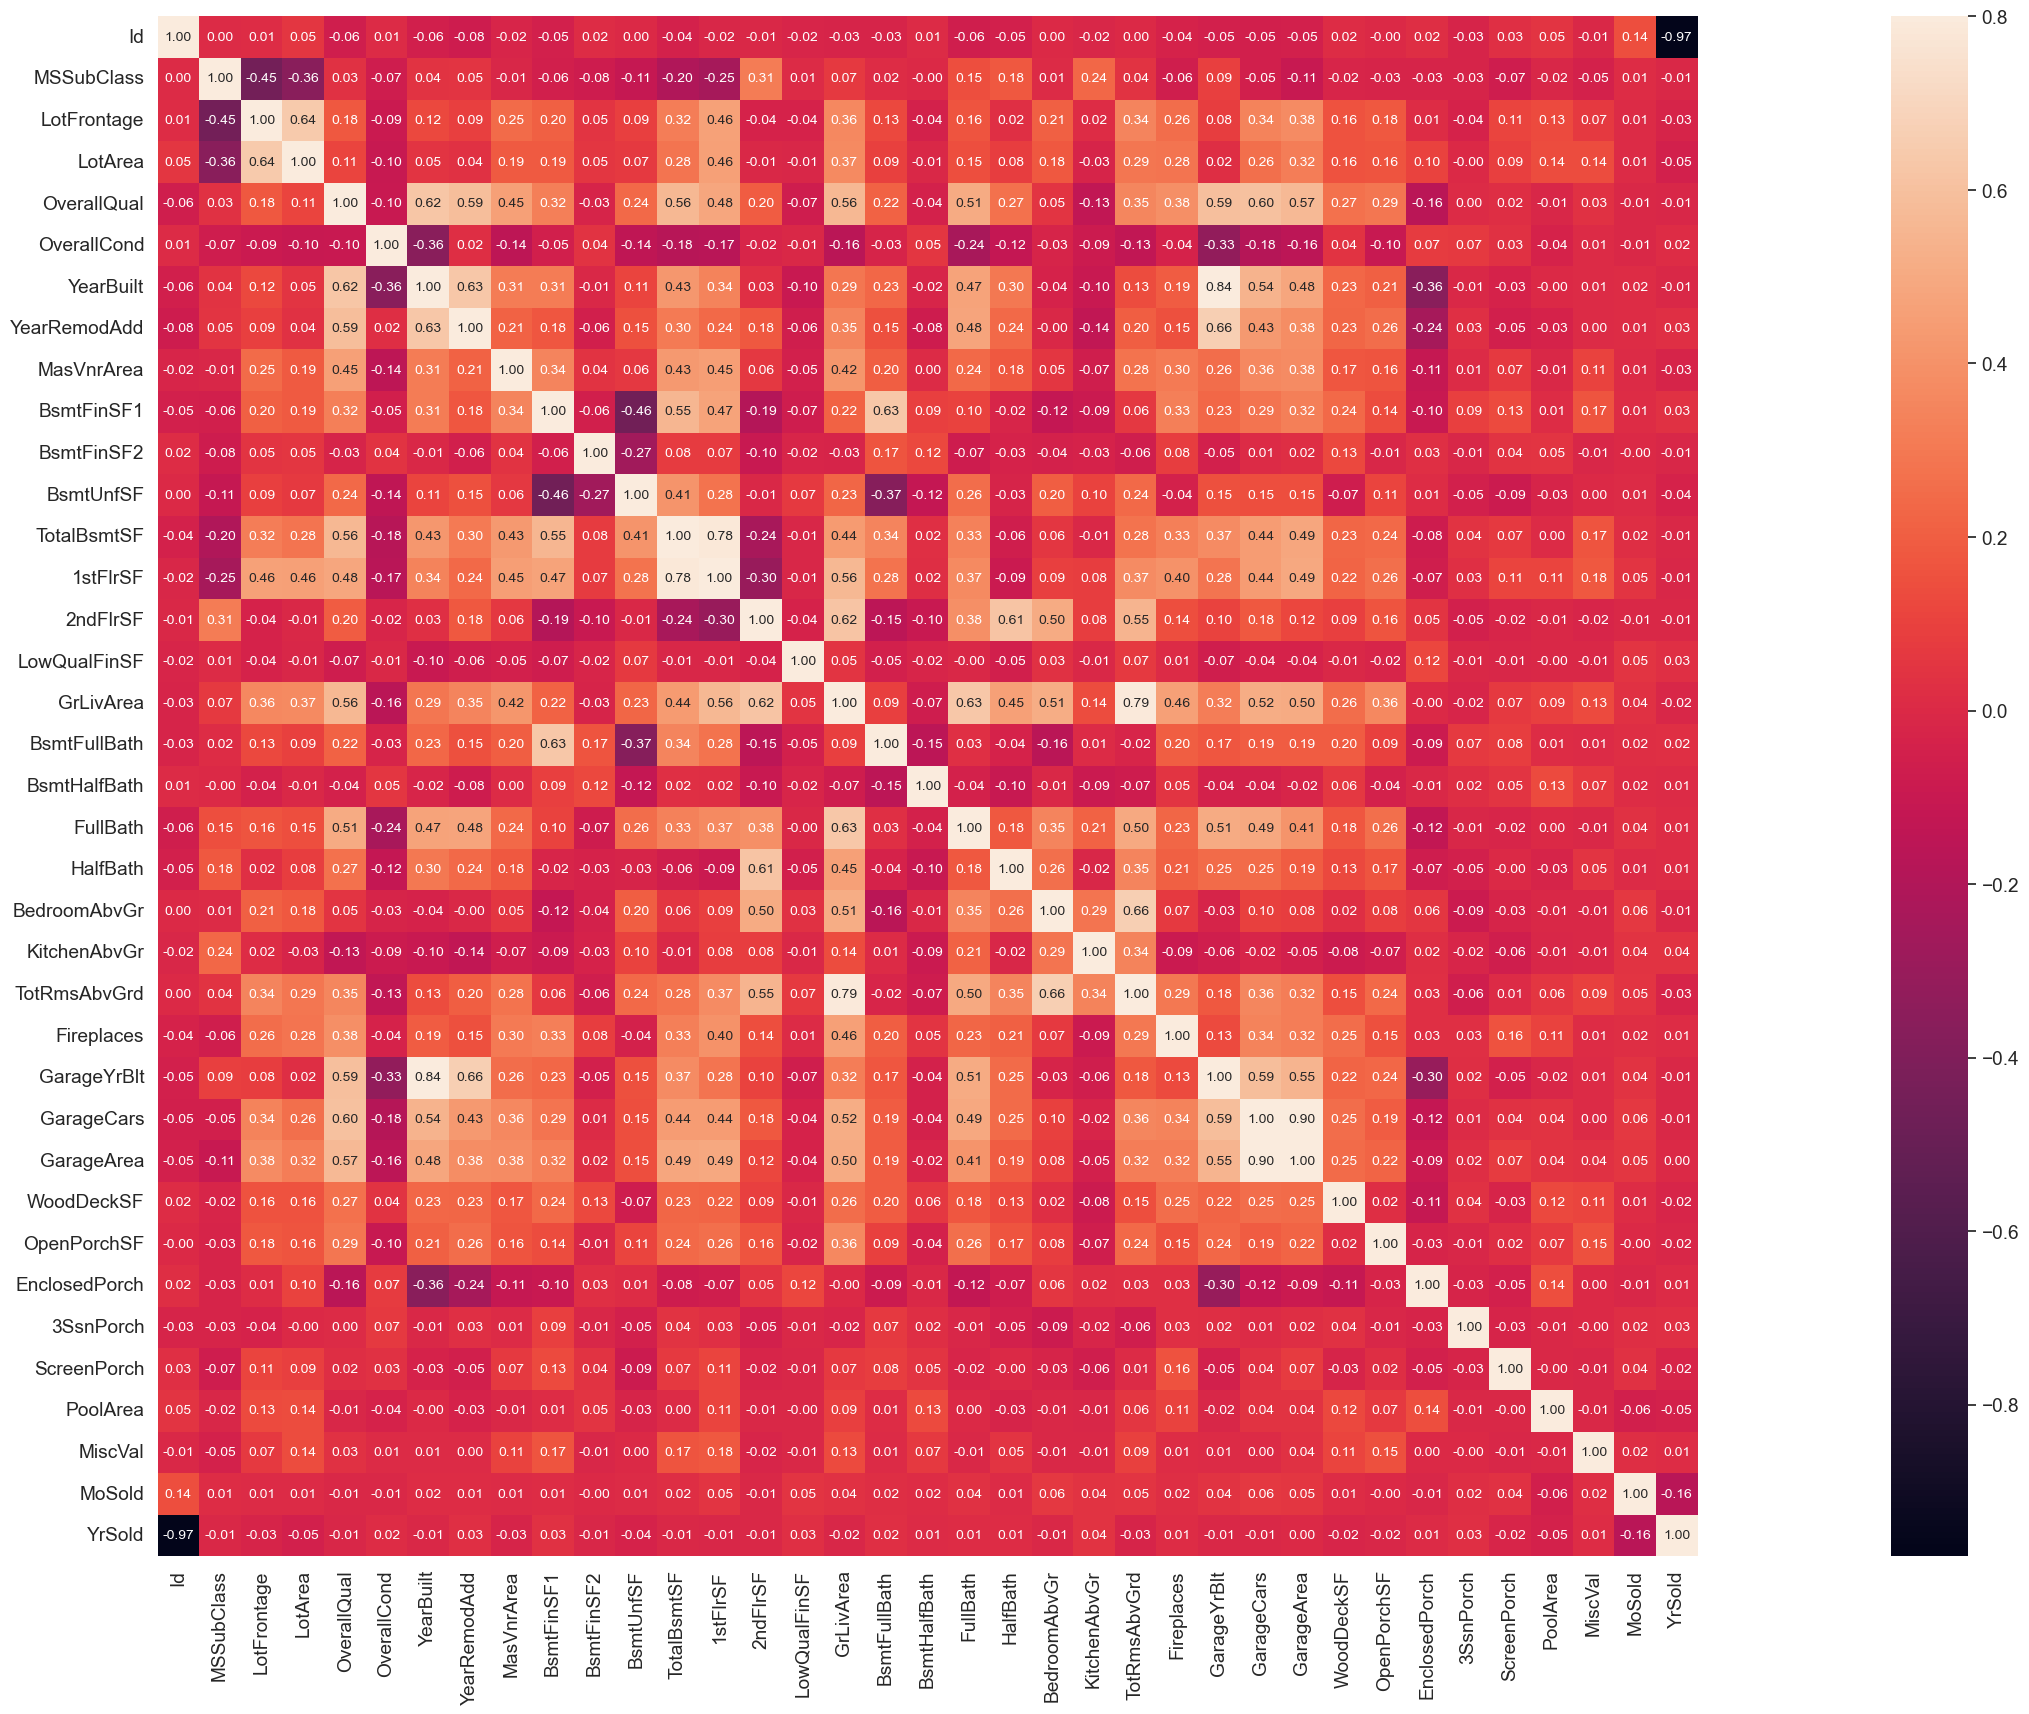

In [148]:
# do the same for test data
corrmat_test = original_test.corr()
f, ax = plot.subplots(figsize=(50, 20))
sns.heatmap(corrmat_test, vmax=.8, square=True, annot=True, fmt='.2f', annot_kws={'size': 10});

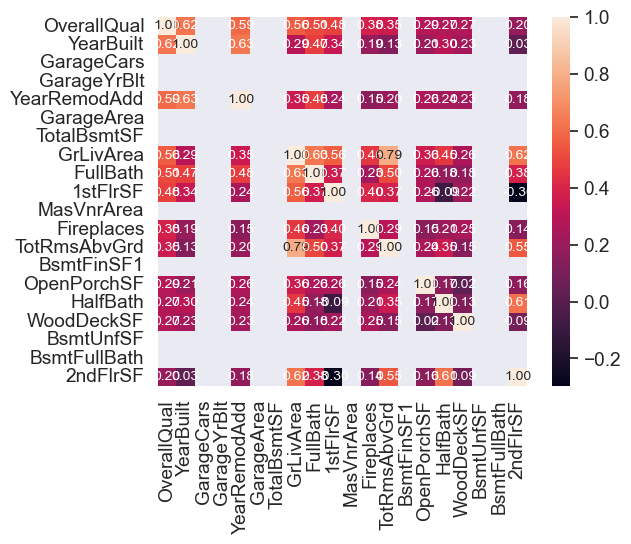

In [149]:
k = 20
cols = corrmat_test.nlargest(k, 'OverallQual')['OverallQual'].index
cm = np.corrcoef(original_test[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plot.show()

In [161]:
original_test.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [162]:
# drop the columns that has more than 227 missing values in the test data
original_test = original_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1)
original_test.isnull().sum().sort_values(ascending=False).head(20)


LotFrontage     227
GarageYrBlt      78
GarageFinish     78
GarageQual       78
GarageCond       78
GarageType       76
BsmtCond         45
BsmtExposure     44
BsmtQual         44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
Utilities         2
Functional        2
BsmtHalfBath      2
BsmtFullBath      2
Exterior2nd       1
BsmtFinSF1        1
dtype: int64

In [ ]:
#column_encode = {'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'IsGaraged', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'}

In [ ]:
#for i in column_encode:
#  encoder = LabelEncoder()
#  encoder.fit_transform(list(train_data[i].values))

#train_data_en = pd.get_dummies(train_data, columns=column_encode)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Problem for Version 1: The data is too Large, drop some columns that is not correlated with SalePrice